# Data Visualization
***
## Setup the Environment
***

In [1]:
import os
import sys
sys.path.insert(1, os.path.abspath(os.path.join(os.getcwd(), '../')))

MatPlotLib is used for creating custom visualizations

In [2]:
import matplotlib.pyplot as plt

In [3]:
import gillespy2

***
## Create the Model
***
Model must include rates, species, and reactions

In [4]:
def create_michaelis_menten(parameter_values=None):
    # Initialize Model
    model = gillespy2.Model(name="Michaelis_Menten")

    # Define Variables (GillesPy2.Species)
    A = gillespy2.Species(name='Substrate', initial_value=301)
    B = gillespy2.Species(name='Enzyme', initial_value=120)
    C = gillespy2.Species(name='Enzyme_Substrate_Complex', initial_value=0)
    D = gillespy2.Species(name='Product', initial_value=0)

    # Add Variables to Model
    model.add_species([A, B, C, D])

    # Define Parameters
    rate1 = gillespy2.Parameter(name='rate1', expression= 0.0017)
    rate2 = gillespy2.Parameter(name='rate2', expression= 0.5)
    rate3 = gillespy2.Parameter(name='rate3', expression = 0.1)
    
    # Add Parameters to Model
    model.add_parameter([rate1, rate2, rate3])

    # Reactions
    r1 = gillespy2.Reaction(
        name="r1", reactants={'Substrate':1, 'Enzyme':1}, products={'Enzyme_Substrate_Complex':1}, rate='rate1'
    )
    r2 = gillespy2.Reaction(
        name="r2", reactants={'Enzyme_Substrate_Complex':1}, products={'Substrate':1, 'Enzyme':1}, rate='rate2'
    )
    r3 = gillespy2.Reaction(
        name="r3", reactants={'Enzyme_Substrate_Complex':1}, products={'Enzyme':1, 'Product':1}, rate='rate3'
    )
    
    # Add Reactions to Model
    model.add_reaction([r1, r2, r3])

    # Define Timespan
    tspan = gillespy2.TimeSpan.linspace(t=100, num_points=101)
    
    # Set Model Timespan
    model.timespan(tspan)
    return model

### Instantiate the Model

In [5]:
model = create_michaelis_menten()

***
## Run the Simulations
***
model.run creates a Results object with a list of Trajectory objects.

In [6]:
results = model.run()

The number_of_trajectories specifies how many times you would like to run the solver. When model.run is ran with multiple trajectories, the Results object returned contains a list of all resulting trajectories.

In [7]:
results_many_trajectories = model.run(number_of_trajectories=5)

***
## Visualizations
***
Results makes use of .plot() to make matplotlib graphs as well as .plotplotly() in order to create more advanced interactable plotly graphs. Plotly graphs can only be displayed in Jupyter Notebooks.

To pass an argument to plotly's Layout constructor, simply include it in the call to Results.plotplotly(). See the parameter xaxis_type='log' in the subsequent cell.

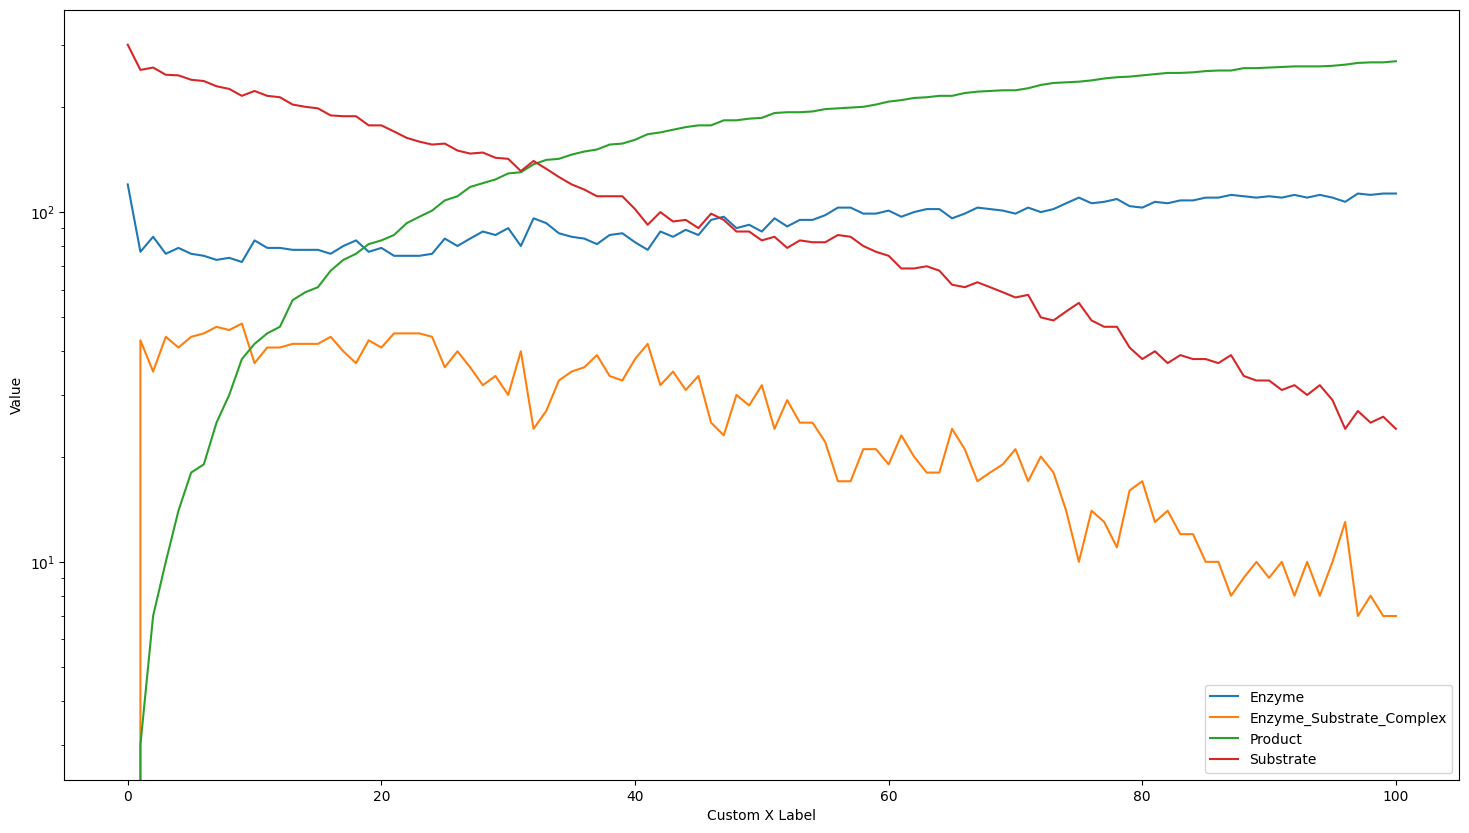

In [8]:
results.plot(yscale='log',xaxis_label='Custom X Label')

In [9]:
results.plotplotly(yaxis_type='log')

Results.plot() and Results.plotplotly() take optional arguments for custom labels and titles. The included_species_list may be used to limit which species are included in the graph.

Additionally, plot() and plot_std_dev_range() (the matplotlib graphers) include the optional figsize keyword which takes a tuple of the form figsize = (width,height).

Lastly, plot() has the style keyword which can be used to define which matplotlib style the graph uses. A complete list of possible styles can be found at https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html. 

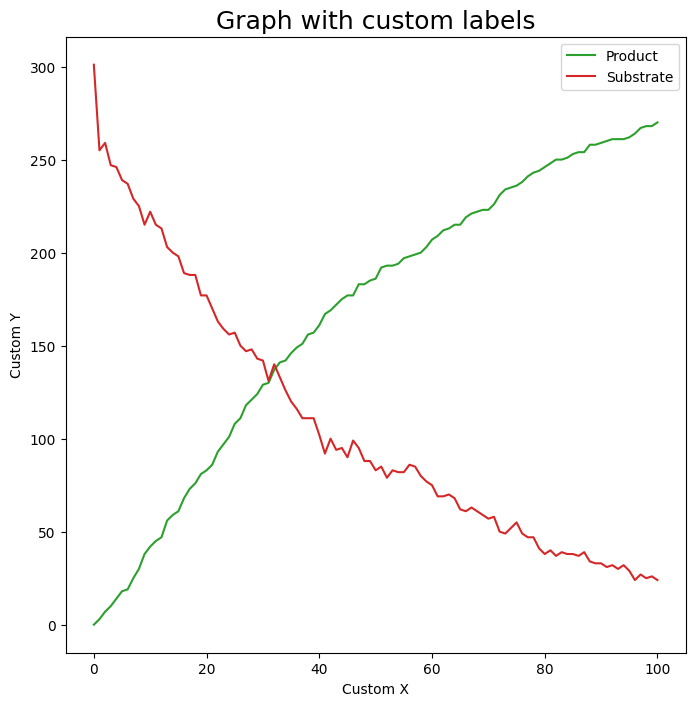

In [10]:
results.plot(xaxis_label ="Custom X", yaxis_label ="Custom Y", title = "Graph with custom labels", show_legend=True,figsize= (8,8),included_species_list=['Product','Substrate'])

plot() also includes the save_png keyword which may be set to True in order to save the matplotlib graph as a png file. plotplotly() does not support the save_png keyword however plotly graphs may be saved inline by clicking on the camera icon in the top right.
### Ploting multiple runs
By default, multiple trajectories are displayed in a single graph.

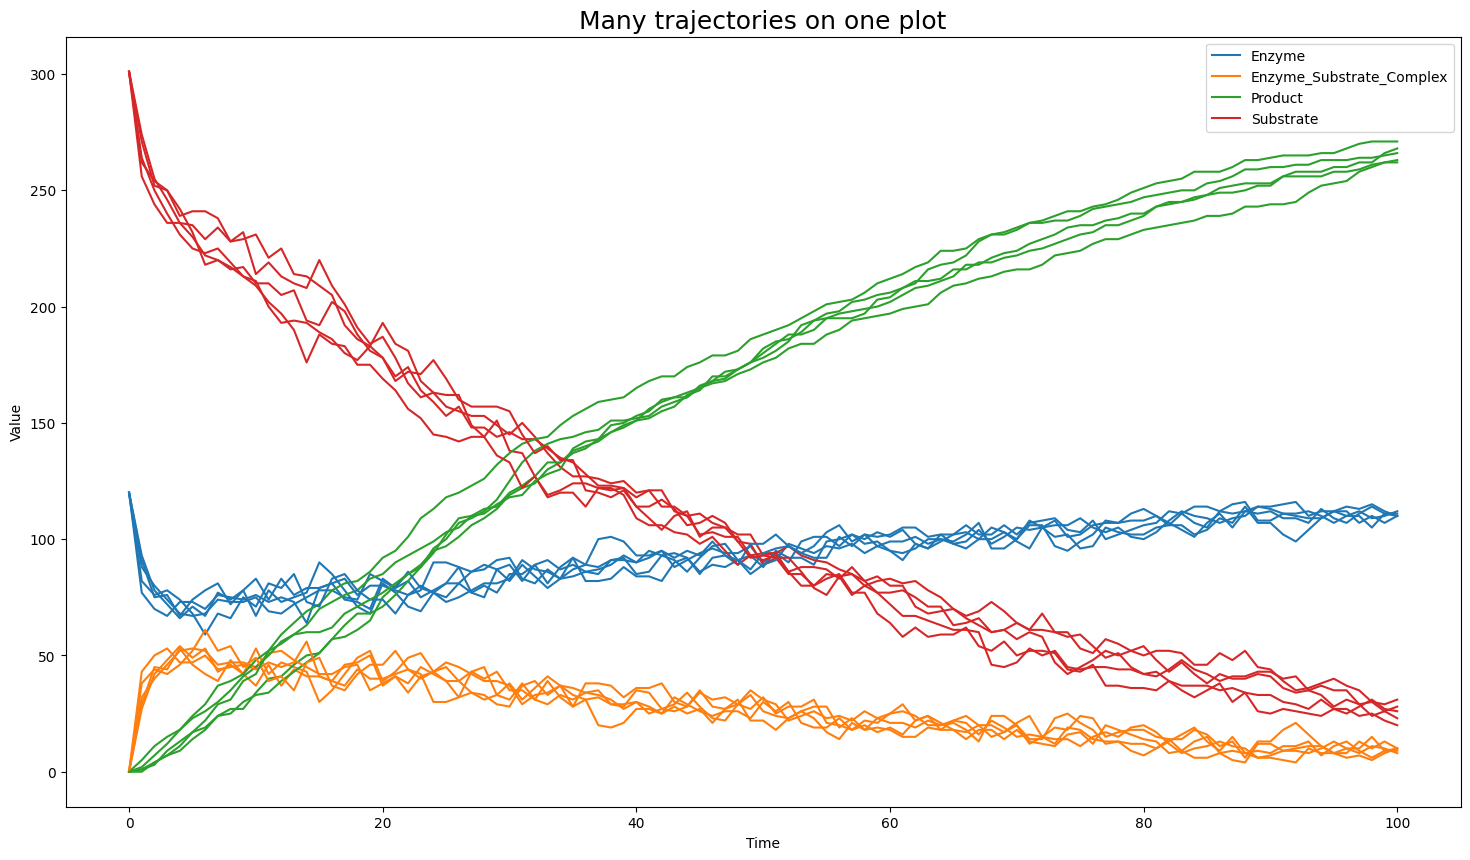

In [11]:
results_many_trajectories.plot(title="Many trajectories on one plot")

In [12]:
results_many_trajectories.plotplotly(title="Many trajectories on one plot")

Results can use the average_ensemble function to create a single results dictionary of the average of the trajectories. 

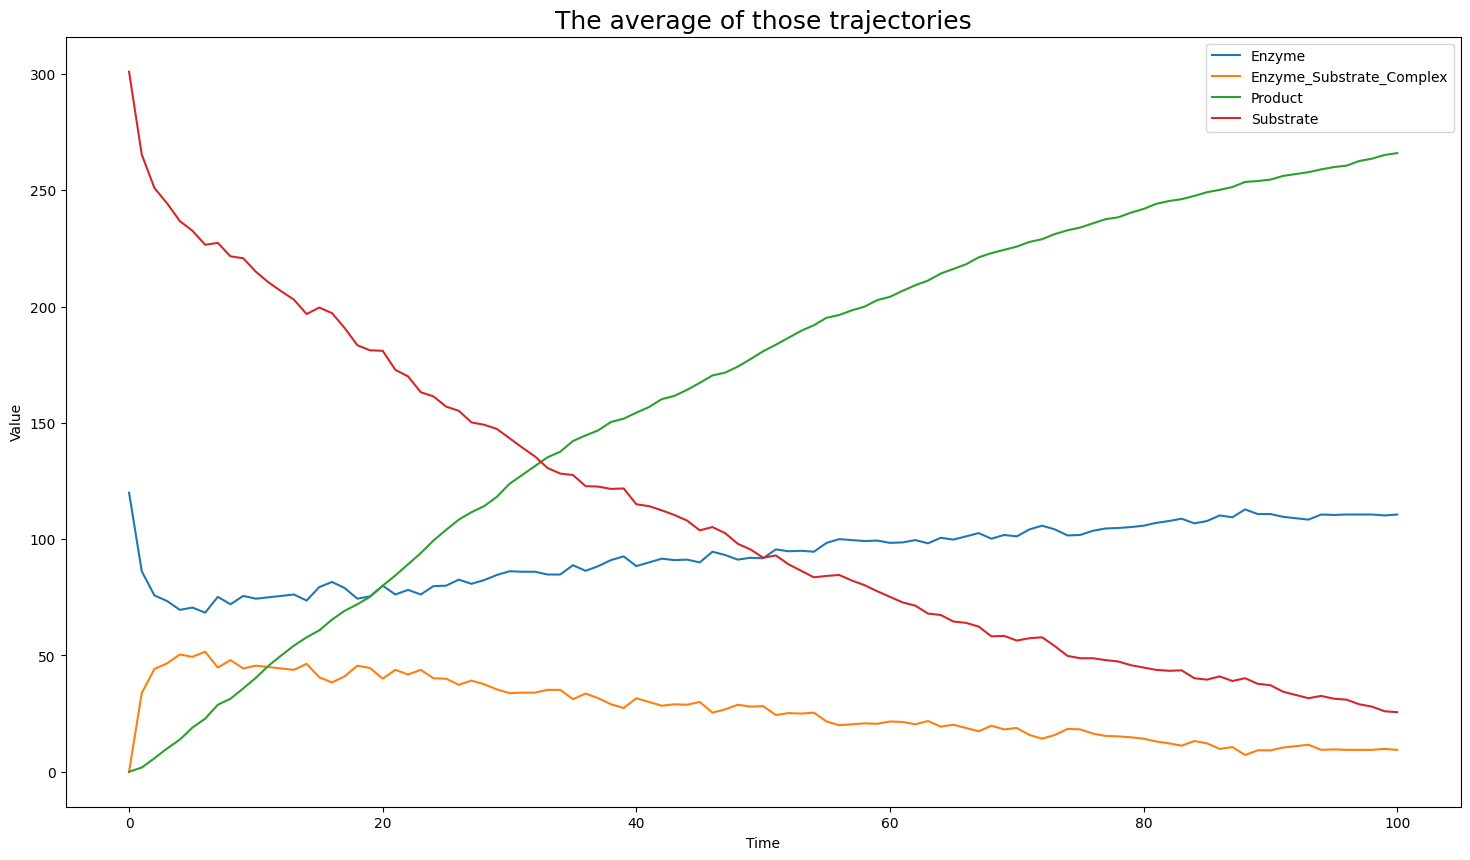

In [13]:
average_results = results_many_trajectories.average_ensemble()
average_results.plot(title="The average of those trajectories")

Results can use the stddev_results function to create a single results dictionary of the standard deviation of the trajectories. 

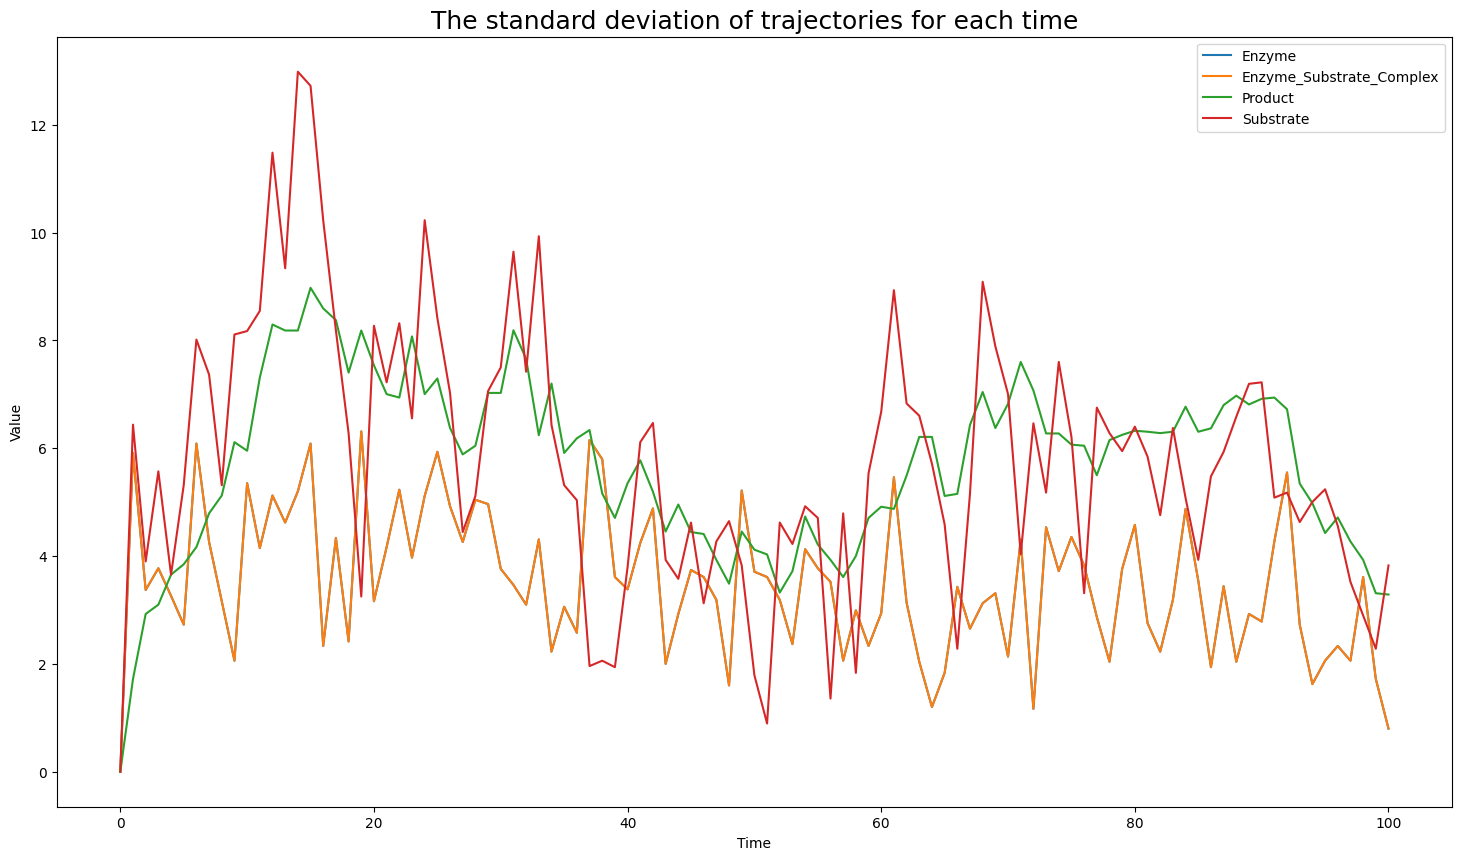

In [14]:
stddev_results = results_many_trajectories.stddev_ensemble()
stddev_results.plot(title="The standard deviation of trajectories for each time")

Standard deviation range and mean may be visualized with the plot_std_dev_range() and plotplotly_std_dev_range() as well as using plotplotly_mean_stdev and plot_mean_stdev

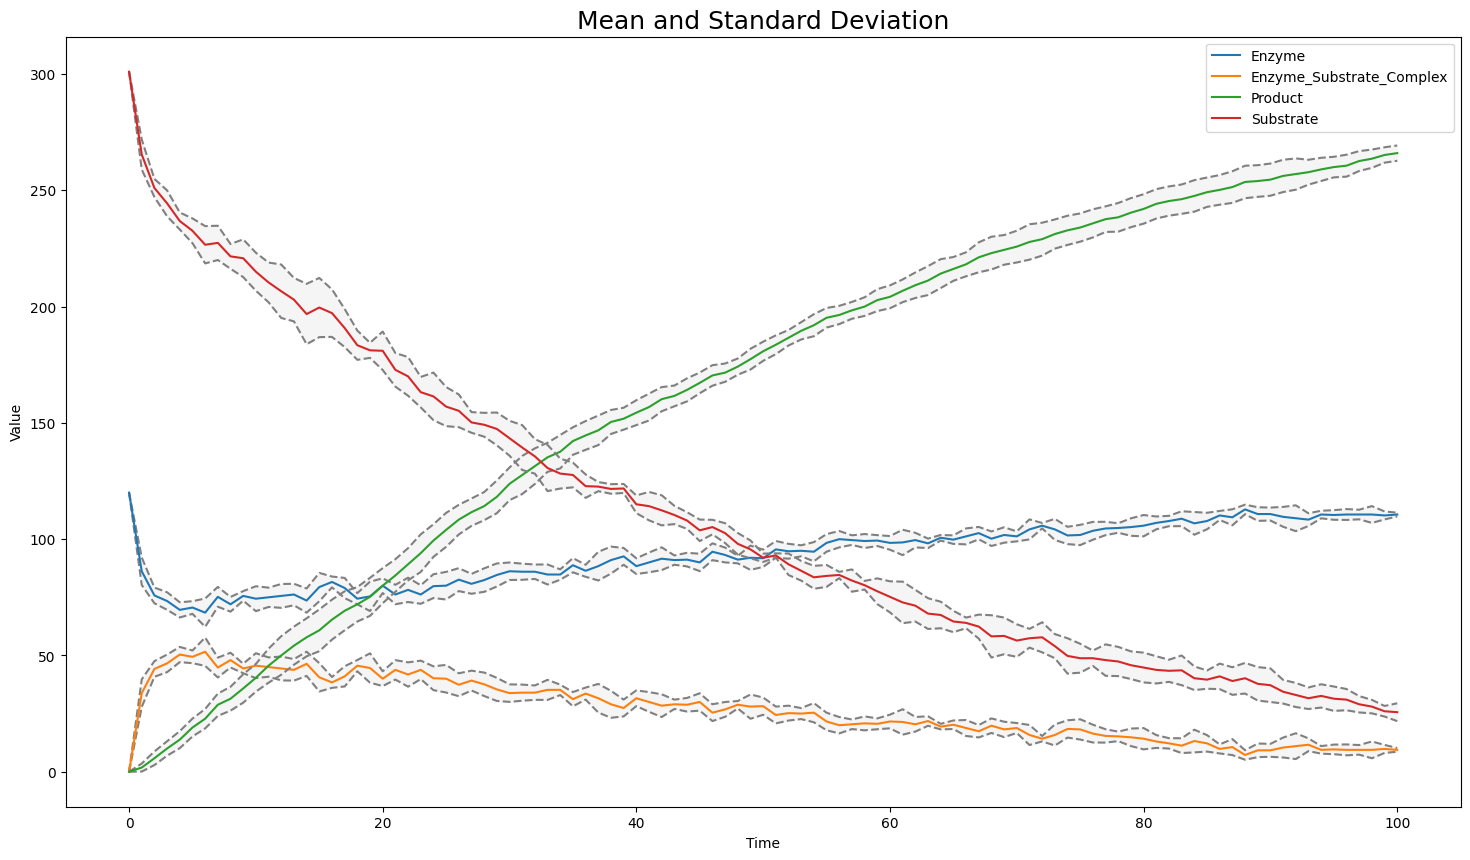

In [15]:
results_many_trajectories.plot_mean_stdev()

In [16]:
results_many_trajectories.plotplotly_mean_stdev()

Results objects are lists of Trajectory objects, which are dictionaries containing lists of species population data. Data from the first Trajectory in the list may be accessed directly from the Results object. Custom plots may be created using matplotlib as in the example below.

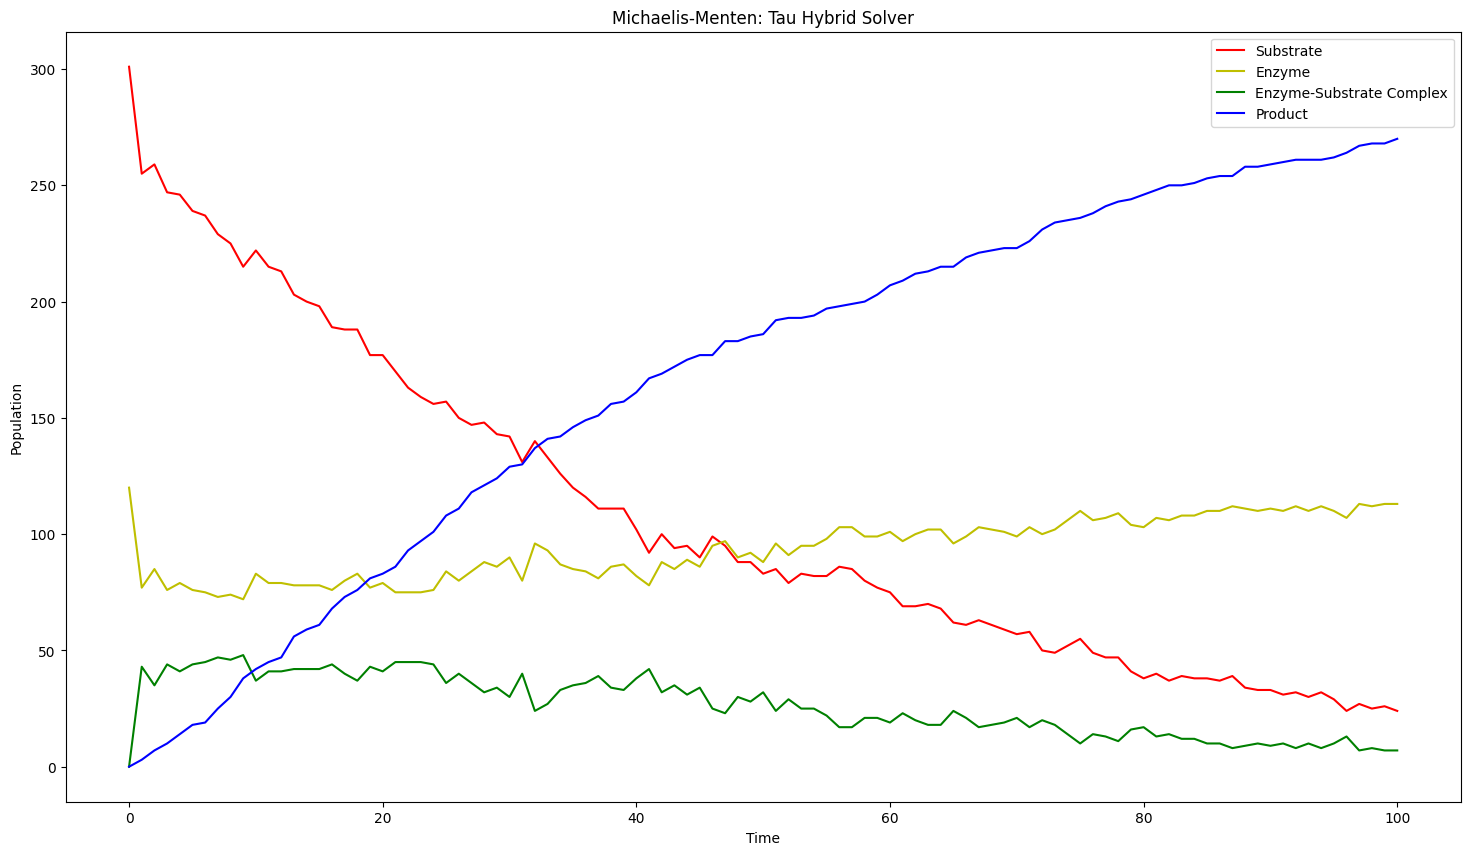

In [17]:
plt.figure(figsize=(18,10))
plt.title("Michaelis-Menten: Tau Hybrid Solver")
plt.xlabel("Time")
plt.ylabel("Population")
plt.plot(results['time'],results['Substrate'],'r', label='Substrate')
plt.plot(results['time'],results['Enzyme'],'y', label='Enzyme')
plt.plot(results['time'],results['Enzyme_Substrate_Complex'],'g', label='Enzyme-Substrate Complex')
plt.plot(results['time'],results['Product'],'b', label='Product')
plt.plot([0],[11])
plt.legend(loc='best')

### A more complete list of arguments for each of the above methods can be found [in the documentation](https://stochss.github.io/GillesPy2/classes/gillespy2.core.html#gillespy2.core.results.Results).